In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import glob
import glob

folder_path = "/content/drive/MyDrive/Wall 1 New"
image_paths = sorted(glob.glob(folder_path + "/*.jpg"))
print(image_paths)

#========================
#Reading images
#========================
imgs = [cv2.imread(p) for p in image_paths]

#============================
#Checking if images are loaded
#============================
for i, img in enumerate(imgs):
    if img is None:
        print(f"Image {image_paths[i]} failed to load")
#=================
#Creating stitcher
#=================
stitcher = cv2.Stitcher_create()

#===============
#Stitching images
#===============
status, pano = stitcher.stitch(imgs)

if status != cv2.Stitcher_OK:
    print("Wall1 stitching failed with error code:", status)
else:
    cv2.imwrite("/content/drive/MyDrive/wall1_panorama.jpg", pano)
    print("Wall1 panorama saved successfully!")



['/content/drive/MyDrive/Wall 1 New/Wall1_1.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_10.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_11.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_12.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_13.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_2.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_3.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_4.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_5.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_6.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_7.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_8.jpg', '/content/drive/MyDrive/Wall 1 New/Wall1_9.jpg']
Wall1 panorama saved successfully!


In [ ]:
folder_path = "/content/drive/MyDrive/Wall 4 New"
image_paths = sorted(glob.glob(folder_path + "/*.jpg"))  
print(image_paths)


#========================
#Reading images
#========================
imgs = [cv2.imread(p) for p in image_paths]

#============================
#Checking if images are loaded
#============================
for i, img in enumerate(imgs):
    if img is None:
        print(f"Image {image_paths[i]} failed to load")

#=================
#Creating stitcher
#=================
stitcher = cv2.Stitcher_create()


#===============
#Stitching images
#===============
status, pano = stitcher.stitch(imgs)

if status != cv2.Stitcher_OK:
    print("Wall4 stitching failed with error code:", status)
else:
    cv2.imwrite("/content/drive/MyDrive/wall4_panorama.jpg", pano)
    print("Wall4 panorama saved successfully!")



['/content/drive/MyDrive/Wall 4 New/Wall4_1.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_10.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_11.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_12.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_13.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_14.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_2.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_3.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_4.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_5.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_6.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_7.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_8.jpg', '/content/drive/MyDrive/Wall 4 New/Wall4_9.jpg']
Wall4 panorama saved successfully!


Images found: ['/content/drive/MyDrive/Wall2/Wall2_1.jpg', '/content/drive/MyDrive/Wall2/Wall2_10.jpg', '/content/drive/MyDrive/Wall2/Wall2_11.jpg', '/content/drive/MyDrive/Wall2/Wall2_12.jpg', '/content/drive/MyDrive/Wall2/Wall2_2.jpg', '/content/drive/MyDrive/Wall2/Wall2_3.jpg', '/content/drive/MyDrive/Wall2/Wall2_4.jpg', '/content/drive/MyDrive/Wall2/Wall2_5.jpg', '/content/drive/MyDrive/Wall2/Wall2_6.jpg', '/content/drive/MyDrive/Wall2/Wall2_7.jpg', '/content/drive/MyDrive/Wall2/Wall2_8.jpg', '/content/drive/MyDrive/Wall2/Wall2_9.jpg']
Panorama saved successfully at /content/drive/MyDrive/wall2_panorama_best.jpg!


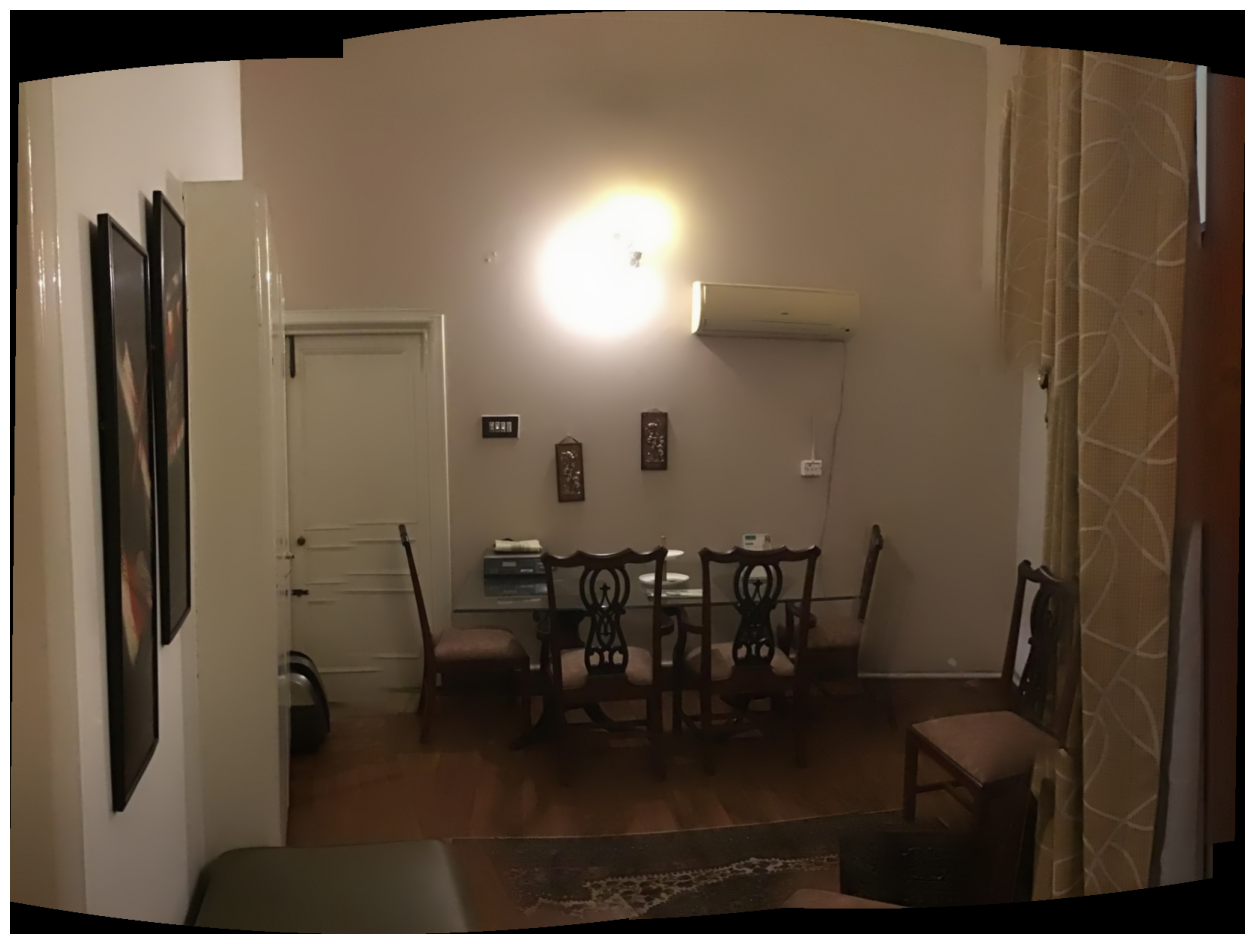

In [ ]:
folder_path = "/content/drive/MyDrive/Wall2"
image_paths = sorted(glob.glob(folder_path + "/*.jpg"))  
print("Images found:", image_paths)

#========================
#Reading images
#========================
imgs = []
for p in image_paths:
    img = cv2.imread(p)
    if img is None:
        print(f"Failed to load: {p}")
        continue
    max_dim = 1200
    scale = max_dim / max(img.shape[:2])
    if scale < 1:
        img = cv2.resize(img, (0,0), fx=scale, fy=scale)
    imgs.append(img)

if len(imgs) < 2:
    raise ValueError("Need at least 2 images to stitch!")

#===================================
# Feature detection and matching 
#===================================
def debug_keypoints(img1, img2):
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append(m)
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=2)
    plt.figure(figsize=(20,10))
    plt.imshow(img_matches)
    plt.axis('off')
    plt.show()
    print(f"Good matches: {len(good)}")


#=================
#Creating stitcher
#=================
stitcher = cv2.Stitcher_create(cv2.Stitcher_PANORAMA)
stitcher.setPanoConfidenceThresh(0.3)  

#===============
#Stitching images
#===============
status, pano = stitcher.stitch(imgs)

if status != cv2.Stitcher_OK:
    print("Stitching failed with error code:", status)
    
else:
    output_path = "/content/drive/MyDrive/wall2_panorama_best.jpg"
    cv2.imwrite(output_path, pano)
    print(f"Panorama saved successfully at {output_path}!")
    plt.figure(figsize=(24,12))
    plt.imshow(cv2.cvtColor(pano, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [ ]:
wall_panos = [
    "/content/wall1_panorama_new__cropped.jpg",
    "/content/wall2_panorama_newcropped.jpg",
    "/content/wall3_panorama_new_cropped.jpg",
    "/content/wall4_panorama_new__cropped.jpg"

]

output_path = "/content/drive/MyDrive/full_room_panorama_new.jpg"
blend_width = 60  
target_height = 1024  

#====================
#Reversing the order
#====================
wall_panos = wall_panos[::-1]

#==============
#Reading images
#=============
images = [cv2.imread(p) for p in wall_panos]

#=================================
#Resizing all to same target height
#==================================
resized_imgs = []
for img in images:
    h, w = img.shape[:2]
    scale = target_height / h
    new_w = int(w * scale)
    resized = cv2.resize(img, (new_w, target_height), interpolation=cv2.INTER_CUBIC)
    resized_imgs.append(resized)

#================
#Blending images
#===============
def blend_edges(img1, img2, blend_width=60):
    blend_width = min(blend_width, img1.shape[1]//2, img2.shape[1]//2)

    alpha = np.linspace(0, 1, blend_width).reshape(1, -1, 1)
    img1_edge = img1[:, -blend_width:]
    img2_edge = img2[:, :blend_width]

    blended_edge = (img1_edge * (1 - alpha) + img2_edge * alpha).astype(np.uint8)

    combined = np.hstack([img1[:, :-blend_width], blended_edge, img2[:, blend_width:]])
    return combined
full_panorama = resized_imgs[0]
for next_wall in resized_imgs[1:]:
    full_panorama = blend_edges(full_panorama, next_wall, blend_width)

#=================
#Sharpening images
#=================
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
full_panorama = cv2.filter2D(full_panorama, -1, kernel)

#===============
#Saving panaroma
#===============
cv2.imwrite(output_path, full_panorama)
print(f"Final full-room panorama saved at: {output_path}")


Final full-room panorama saved at: /content/drive/MyDrive/full_room_panorama_new.jpg
